## Observations and Insights 

#1.From Bar chart, we can find that Capomulin and Ramicane in Drug Regimen have the most Mouse number in this case. Also, the percentage of male is slightly larger than female based on the pie chart created below.	
#2.According to Quartiles, Outliers and Boxplots parts created below, only Infubinol, which in group Capomulin, Ramicane, Infubinol, and Ceftamin, has one outlier.
#3.The correlation between Mouse weight and Avg Tumor Volume is around 0.83, which is really close to 1, it means Mouse weight has a high correlation with Avg Tumor Volume. Meanwhile, the linear regression chart can prove the result as well, all the scatter points locate around regression line which agrees with rhe high correlation. 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_file = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_file.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [78]:
# Checking the number of mice.
number_mice = combined_file['Mouse ID'].nunique()
number_mice

249

In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_file['Timepoint'] = combined_file['Timepoint'].astype(str)
combined_file['MouseID & Timepoint'] = combined_file['Mouse ID'].str.cat(combined_file['Timepoint'], sep='')
DuplicateMouse = combined_file[~combined_file.duplicated(subset=['Mouse ID'])]
DuplicateMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID & Timepoint
0,k403,Ramicane,Male,21,16,0,45.00,0,k4030
10,s185,Capomulin,Female,3,17,0,45.00,0,s1850
20,x401,Capomulin,Female,16,15,0,45.00,0,x4010
30,m601,Capomulin,Male,22,17,0,45.00,0,m6010
40,g791,Ramicane,Male,11,16,0,45.00,0,g7910
...,...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.00,0,z3140
1860,z435,Propriva,Female,12,26,0,45.00,0,z4350
1863,z581,Infubinol,Female,24,25,0,45.00,0,z5810
1873,z795,Naftisol,Female,13,29,0,45.00,0,z7950


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#combined_file.sort_values("Mouse ID", inplace = True)
clean_D = combined_file.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
clean_D

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID & Timepoint
0,k403,Ramicane,Male,21,16,0,45.00,0,k4030
1,k403,Ramicane,Male,21,16,5,38.83,0,k4035
2,k403,Ramicane,Male,21,16,10,35.01,1,k40310
3,k403,Ramicane,Male,21,16,15,34.22,1,k40315
4,k403,Ramicane,Male,21,16,20,33.00,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.84,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.18,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.31,4,z96940


In [5]:
# Checking the number of mice in the clean DataFrame.
numbermice = clean_D['Mouse ID'].count()
numbermice

1883

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
sstat = clean_D['Drug Regimen'].unique()
mean0=[]
median0=[]
variance0=[]
stdev0=[]
serrorm0=[]

for aa in sstat:
    mean0.append(clean_D.loc[clean_D['Drug Regimen']==aa,"Tumor Volume (mm3)"].mean())
    median0.append(clean_D.loc[clean_D['Drug Regimen']==aa,"Tumor Volume (mm3)"].median())
    variance0.append(clean_D.loc[clean_D['Drug Regimen']==aa,"Tumor Volume (mm3)"].var())
    stdev0.append(clean_D.loc[clean_D['Drug Regimen']==aa,"Tumor Volume (mm3)"].std())
    serrorm0.append(clean_D.loc[clean_D['Drug Regimen']==aa,"Tumor Volume (mm3)"].sem())

conclusion0 = pd.DataFrame({'Drug Regimen': pd.Series(sstat),
                            "mean": pd.Series(mean0), 
                            'median': pd.Series(median0),
                            'variance': pd.Series(variance0),
                            'standard deviation': pd.Series(stdev0),
                            'SEM': pd.Series(serrorm0)})

pd.options.display.float_format = '{:.2f}'.format
conclusion0.set_index("Drug Regimen",inplace=True)
conclusion0


,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,54.03,52.29,61.17,7.82,0.58
Ceftamin,52.59,51.78,39.29,6.27,0.47
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52
Ketapril,55.24,53.70,68.55,8.28,0.60
Propriva,52.39,50.91,43.14,6.57,0.53


In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
mean = clean_D.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_D.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_D.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = clean_D.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
serrorm = clean_D.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

conclusion = pd.DataFrame({"mean": pd.Series(mean), 
                           'median': median,
                           'variance': variance,
                           'standard deviation': stdev,
                           'SEM': serrorm})

pd.options.display.float_format = '{:.2f}'.format

conclusion


,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

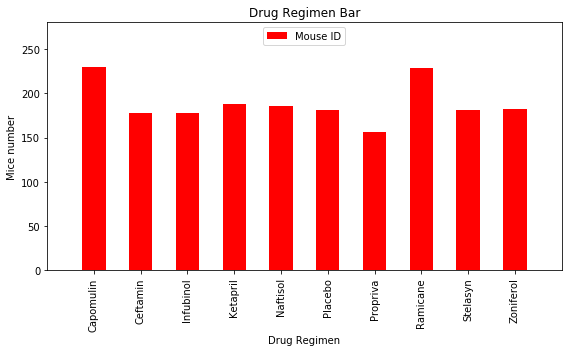

In [82]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
BBar = clean_D.groupby(['Drug Regimen'])
BBar_number = BBar['Mouse ID'].count()
BarChart1 = BBar_number.plot(kind="bar", figsize=(8,5), color="red", rot=90)
BarChart1.set_xlabel("Drug Regimen")
BarChart1.set_ylabel("Mice number")
BarChart1.set_title("Drug Regimen Bar")
DrugName = clean_D['Drug Regimen'].unique()
BarChart1.set_xlim(-1, len(DrugName))
BarChart1.set_ylim(0, max(BBar_number)+50)
BarChart1.legend(loc="upper center")
plt.tight_layout()
plt.show()

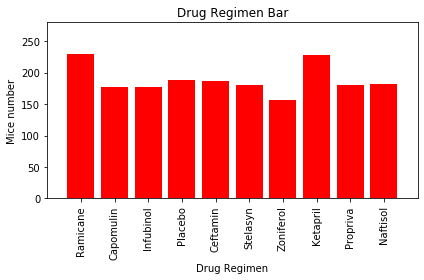

In [83]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=DrugName
y_axis=[]
for aa in sorted(DrugName):
    y_axis.append(BBar_number[aa])
plt.bar(x_axis,y_axis,color="red",align="center")
plt.xticks(rotation=90)
#plt.figure(figsize=(8,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Mice number")
plt.title("Drug Regimen Bar")
plt.xlim(-1, len(DrugName))
plt.ylim(0, max(BBar_number)+50)
plt.tight_layout()
plt.show()

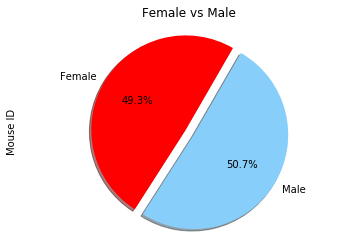

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
PPie = clean_D.groupby(['Sex'])
PPie_number = PPie['Mouse ID'].count()
colors=["red", "lightskyblue"]
PieChart = PPie_number.plot(kind="pie", shadow=True, explode=[0.1,0], colors=colors, autopct="%1.1f%%", startangle=60)
PieChart.set_title("Female vs Male")
PieChart.axis("equal")
plt.show()

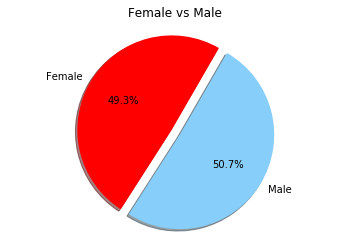

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
PPie1 = clean_D.groupby(['Sex'])
PPie_number1 = PPie1['Mouse ID'].count()
colors=["red", "lightskyblue"]
plt.pie(PPie_number1, colors=colors,explode=[0.1,0],shadow=True,startangle=60,autopct="%1.1f%%", labels=["Female","Male"])
plt.title("Female vs Male")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data_QOB = clean_D
data_QOB['Timepoint'] = data_QOB['Timepoint'].astype(float)
data_QOB = data_QOB.sort_values('Timepoint', ascending=False)
last_T = data_QOB[~data_QOB.duplicated(subset=['Mouse ID'])]
last_T

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID & Timepoint
1892,z969,Naftisol,Male,9,30,45.00,73.87,4,z96945
834,f345,Infubinol,Male,23,26,45.00,60.92,1,f34545
962,i635,Propriva,Male,21,26,45.00,58.63,3,i63545
134,r554,Capomulin,Female,8,17,45.00,32.38,3,r55445
930,h246,Ketapril,Male,13,30,45.00,74.10,2,h24645
...,...,...,...,...,...,...,...,...,...
752,d133,Zoniferol,Male,5,30,0.00,45.00,0,d1330
594,b447,Ceftamin,Male,2,30,0.00,45.00,0,b4470
1551,t573,Ceftamin,Female,15,27,0.00,45.00,0,t5730
851,f932,Ketapril,Male,15,29,0.00,45.00,0,f9320


In [87]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes   
    # add subset 
    # Determine outliers using upper and lower bounds
    
#Infubinol
infubinal_name = last_T.loc[last_T["Drug Regimen"]=="Infubinol", :]
infubinal_quartiles = infubinal_name["Tumor Volume (mm3)"].quantile([.25,.5,.75])
infubinal_lowerq = infubinal_quartiles[0.25]
infubinal_upperq = infubinal_quartiles[0.75]
infubinal_iqr = infubinal_upperq-infubinal_lowerq
infubinal_lowerq_bound = infubinal_lowerq - (1.5*infubinal_iqr)
infubinal_upperq_bound = infubinal_upperq + (1.5*infubinal_iqr)
count1 = 0
for x in range(len(infubinal_name["Mouse ID"])):
    if (infubinal_name.iloc[x,6]>infubinal_upperq_bound) | (infubinal_name.iloc[x,6]<infubinal_lowerq_bound):
        count1 = count1 + 1
print(f"The lower quartile of Infubinol is: {round(infubinal_lowerq,2)}")
print(f"The upper quartile of Infubinol is: {round(infubinal_upperq,2)}")
print(f"The interquartile range of Infubinol is: {round(infubinal_iqr,2)}")
print(f"The the median of Infubinol is: {round(infubinal_quartiles[0.5],2)} ")
print(f"Values below {round(infubinal_lowerq_bound,2)} could be outliers.")
print(f"Values above {round(infubinal_upperq_bound,2)} could be outliers.")
print(f"There are {count1} outliers existing.")    

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
There are 1 outliers existing.


In [88]:
#Ceftamin
Ceftamin_name = last_T.loc[last_T["Drug Regimen"]=="Ceftamin", :]
Ceftamin_quartiles = Ceftamin_name["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq
Ceftamin_lowerq_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upperq_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
count2 = 0
for y in range(len(Ceftamin_name["Mouse ID"])):
    if (Ceftamin_name.iloc[y,6]>Ceftamin_upperq_bound) | (Ceftamin_name.iloc[y,6]<Ceftamin_lowerq_bound):
        count2 = count2 + 1
print(f"The lower quartile of Ceftamin is: {round(Ceftamin_lowerq,2)}")
print(f"The upper quartile of Ceftamin is: {round(Ceftamin_upperq,2)}")
print(f"The Ceftamin range of Ceftamin is: {round(Ceftamin_iqr,2)}")
print(f"The the median of Ceftamin is: {round(Ceftamin_quartiles[0.5],2)} ")
print(f"Values below {round(Ceftamin_lowerq_bound,2)} could be outliers.")
print(f"Values above {round(Ceftamin_upperq_bound,2)} could be outliers.")
print(f"There are {count2} outliers existing.")    

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The Ceftamin range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
There are 0 outliers existing.


In [89]:
#Capomulin
Capomulin_name = last_T.loc[last_T["Drug Regimen"]=="Capomulin", :]
Capomulin_quartiles = Capomulin_name["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq
Capomulin_lowerq_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upperq_bound = Capomulin_upperq + (1.5*Capomulin_iqr)
count3 = 0
for z in range(len(Capomulin_name["Mouse ID"])):
    if (Capomulin_name.iloc[z,6]>Capomulin_upperq_bound) | (Capomulin_name.iloc[z,6]<Capomulin_lowerq_bound):
        count3 = count3 + 1
print(f"The lower quartile of Capomulin is: {round(Capomulin_lowerq,2)}")
print(f"The upper quartile of Capomulin is: {round(Capomulin_upperq,2)}")
print(f"The Ceftamin range of Capomulin is: {round(Capomulin_iqr,2)}")
print(f"The the median of Capomulin is: {round(Capomulin_quartiles[0.5],2)} ")
print(f"Values below {round(Capomulin_lowerq_bound,2)} could be outliers.")
print(f"Values above {round(Capomulin_upperq_bound,2)} could be outliers.")
print(f"There are {count3} outliers existing.")  

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The Ceftamin range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
There are 0 outliers existing.


In [90]:
#Ramicane
Ramicane_name = last_T.loc[last_T["Drug Regimen"]=="Ramicane", :]
Ramicane_quartiles = Ramicane_name["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq
Ramicane_lowerq_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upperq_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
count4 = 0
for w in range(len(Ramicane_name["Mouse ID"])):
    if (Ramicane_name.iloc[w,6]>Ramicane_upperq_bound) | (Ramicane_name.iloc[w,6]<Ramicane_lowerq_bound):
        count4 = count4 + 1
print(f"The lower quartile of Ramicane is: {round(Ramicane_lowerq,2)}")
print(f"The upper quartile of Ramicane is: {round(Ramicane_upperq,2)}")
print(f"The Ceftamin range of Ramicane is: {round(Ramicane_iqr,2)}")
print(f"The the median of Ramicane is: {round(Ramicane_quartiles[0.5],2)} ")
print(f"Values below {round(Ramicane_lowerq_bound,2)} could be outliers.")
print(f"Values above {round(Ramicane_upperq_bound,2)} could be outliers.")
print(f"There are {count4} outliers existing.")  

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The Ceftamin range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
There are 0 outliers existing.


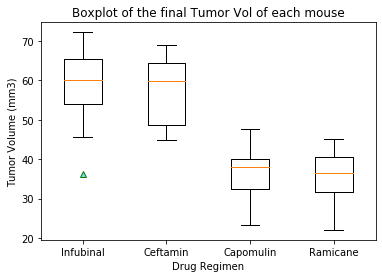

In [91]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
box_data = [infubinal_name["Tumor Volume (mm3)"],Ceftamin_name["Tumor Volume (mm3)"],Capomulin_name["Tumor Volume (mm3)"],Ramicane_name["Tumor Volume (mm3)"]]
beauty = dict(markerfacecolor="lightskyblue",markeredgecolor="green", marker="^")
ax1.set_title('Boxplot of the final Tumor Vol of each mouse')
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(box_data, flierprops=beauty)
tick=[1,2,3,4]
plt.xticks(tick,["Infubinal","Ceftamin","Capomulin","Ramicane"])
plt.show()

## Line and Scatter Plots

input a mouse treated with Capomulin: r944


C:\Users\T-Mac\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


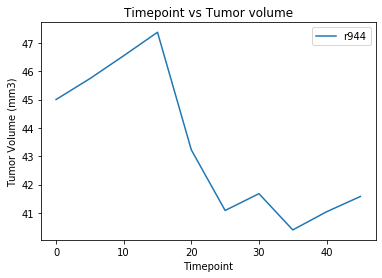

In [92]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
inputID = input("input a mouse treated with Capomulin: ")
line_Chart = clean_D.loc[clean_D['Mouse ID']==inputID, :]
line_Chart['Timepoint'] = line_Chart['Timepoint'].astype(float)
line_Chart = line_Chart.sort_values("Timepoint", ascending=True)
x_axis = line_Chart["Timepoint"]
y_axis = line_Chart["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor volume")
plt.legend([inputID],loc="best")
plt.show()

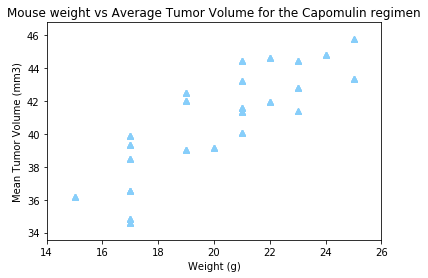

In [93]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
S_data=clean_D.loc[clean_D["Drug Regimen"]=="Capomulin",:]
S_mean = S_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
S_columns=clean_D[["Mouse ID","Weight (g)"]]
S_mean = S_mean.reset_index()
S_merge = pd.merge(S_columns, S_mean, on="Mouse ID")
x_axis = S_merge["Weight (g)"]
y_axis = S_merge["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker='^', facecolors="lightskyblue")
plt.xlabel("Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.xlim(min(x_axis)-1,max(x_axis)+1)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title("Mouse weight vs Average Tumor Volume for the Capomulin regimen")
plt.show()

## Correlation and Regression

correlation between Mouse weight & Avg Tumor Vol is 0.8344
the linear regression formula is y = 0.96x + 21.49


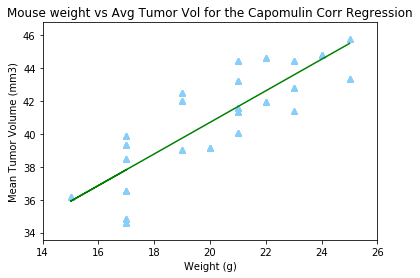

In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
C_corr=st.pearsonr(x_axis, y_axis)
print(f"correlation between Mouse weight & Avg Tumor Vol is {round(C_corr[0],4)}" )
slope,intercept,rvalue,pvalue,stderr=st.linregress(x_axis, y_axis)
print(f"the linear regression formula is y = {round(slope, 2)}x + {round(intercept,2)}")
R_regression=slope*x_axis+intercept
plt.plot(x_axis, R_regression, color='green')
plt.scatter(x_axis, y_axis, marker='^', facecolors="lightskyblue")
plt.xlabel("Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.xlim(min(x_axis)-1,max(x_axis)+1)
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.title("Mouse weight vs Avg Tumor Vol for the Capomulin Corr Regression")
plt.show()